## Theano

Theano is an open source numerical computations library, very efficient for fast numerical computations. 

And that is based on numpy syntax. But what is also great about this library, is that it can run not only on your CPU but also on your GPU.

CPU means central processing unit and it's basically the main processor on your computer that is used for general purpose,
like general tasks that are not graphic tasks.

And speaking of graphic tasks, there is another processor that runs computations for that and this processor is called the GPU.

So it's a processor for graphic purposes, exactly like the graphic card you have on your machine.

And so, in terms of power and in terms of computation efficiency, the GPU is much more powerful because it has many more cores and it's able to run a lot more floating points calculations per second, than the CPU.

Therefore, the CPU is much more specialized for highly compute-intensive tasks and parallel computations, exactly as it is the case for neural networks.

When we are forward-propagating the activations of the different neurons in the neural networks, thanks to the activation functions.

Well, that exactly involves parallel computations.

And saying when the arrow is back-propagated in the neural network, well that involves again parallel computations. Alright, so basically, the GPU is a much better choice for neural networks, especially when you're building deep neural networks to do deep learning.

But for simple neural networks, you can still use your CPU.

Alright, so that's this Theano library, that by the way, was developed by a machinery group of people at the University of Montreal

## Tensorflow

So, Tensoflow is another open-source numerical computations library that runs very fast computations and again that can run on your CPU or your GPU.

This library was originally developed by the Google brain team at Google and is now under the Apache 2.0 license.

And the important thing to understand here is that these two libraries are used, mostly for research and development purposes in the deep learning field. 

That means that if you wanna use these two libraries for deep learning, you would use them to build a deep neural network from scratch. 

That is with many lines of code, which is great if you wanna do some research in order to improve the deep neural networks, invent and develop a new kind of deep neural network, or any other kind of deep learning models, but that would require a lot of lines of code.

That is why, in this section, we are not going to directly use Theano and Tensoflow.

We're gonna use another library that, in some way, wraps the libraries here, Theano and Tensoflow.



## Keras

And this library is, as you might have guessed, the Keras library. The Keras library is an amazing library to build deep learning models like deep neural networks in a very few lines of code.

since we're gonna build very powerful deep neural networks with only a few lines of code and that is only thanks to this Keras library.

This library was developed by François Chollet, a machine learning scientist again at Google.

Keras is a library based on Theano and Tensoflow, that means that it runs on Theano and Tensoflow libraries and exactly as we use scikit-learn to build very efficiently machine learning models, we will use Keras to build deep learning models very efficiently.

# 1- Data Preprocessing

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Checking missing values

In [11]:
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
y = dataset['Exited']

In [13]:
dataset = dataset.drop(['Exited'], axis = 1)

## Unique values for categorical

### for Geography

In [14]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
len(dataset['Geography'].unique())

3

In [16]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### For Gender

In [17]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Encoding the categorical data

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [20]:
#  for Geography
label_geography = LabelEncoder()
dataset['Geography'] = label_geography.fit_transform(dataset['Geography'])

In [21]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [22]:
# for Gender
label_gender = LabelEncoder()
dataset['Gender'] = label_gender.fit_transform(dataset['Gender'])

In [23]:
dataset.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


In [24]:
onehotencoder = OneHotEncoder(categorical_features=[1])
df = onehotencoder.fit_transform(dataset).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [25]:
df = df[:,1:]

In [26]:
type(df)

numpy.ndarray

In [27]:
df[1]

array([0.0000000e+00, 1.0000000e+00, 6.0800000e+02, 0.0000000e+00,
       4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.1254258e+05])

## Correlations

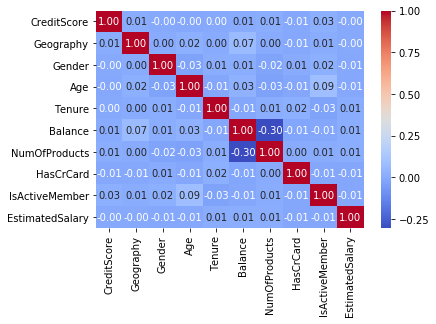

In [28]:
sns.heatmap(dataset.corr(), cmap='coolwarm',annot=True,fmt='.2f')

## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
df = sc.fit_transform(df)


In [31]:
df

array([[-0.57873591, -0.57380915, -0.32622142, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.57873591,  1.74273971, -0.44003595, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.57873591, -0.57380915, -1.53679418, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-0.57873591, -0.57380915,  0.60498839, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.72790383, -0.57380915,  1.25683526, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.57873591, -0.57380915,  1.46377078, ...,  0.64609167,
        -1.03067011, -1.07636976]])

## Split the dataset into Training set and Test set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [34]:
X_train

array([[-0.57873591, -0.57380915,  0.36701255, ...,  0.64609167,
         0.97024255,  1.37378358],
       [ 1.72790383, -0.57380915, -0.19171334, ...,  0.64609167,
         0.97024255,  1.66740729],
       [-0.57873591,  1.74273971, -0.94702796, ...,  0.64609167,
        -1.03067011, -0.24691025],
       ...,
       [-0.57873591, -0.57380915,  0.87400456, ..., -1.54776799,
        -1.03067011, -0.13685352],
       [-0.57873591, -0.57380915,  0.17042381, ...,  0.64609167,
        -1.03067011, -0.04490188],
       [ 1.72790383, -0.57380915,  0.48082708, ...,  0.64609167,
         0.97024255, -0.80874677]])

In [35]:
type(y_train)

pandas.core.series.Series

# 2- Artificial Neural Network

## Importing the keras library and the packages

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


### Initialising the ANN 

In [37]:
classifier = Sequential()

### Adding the input layer and the first hidden layer with dropout

In [38]:
X_train.shape

(8000, 11)

### Dropout Regulation to reduced the overfitting if needed

In [39]:
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dropout(rate=0.01))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Adding the second hidden layer

In [40]:
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dropout(rate = 0.01))

### Adding the output layer

In [41]:
classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

### Compiling the ANN

In [42]:
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

### Fitting the ANN to the trainig set

In [43]:
classifier.fit(X_train, y_train, batch_size= 10, epochs= 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 137us/step - loss: 0.4861 - acc: 0.7945
Epoch 2/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4313 - acc: 0.7945
Epoch 3/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4276 - acc: 0.7945
Epoch 4/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4223 - acc: 0.8192
Epoch 5/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4214 - acc: 0.8254
Epoch 6/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4189 - acc: 0.8271
Epoch 7/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4178 - acc: 0.8287
Epoch 8/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4157 - acc: 0.8314
Epoch 9/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4156 - acc: 0.8294
Epoch 10/100
8000/8000 [==============================] - 1s

8000/8000 [==============================] - 1s 77us/step - loss: 0.4066 - acc: 0.8341
Epoch 81/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4077 - acc: 0.8329
Epoch 82/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4061 - acc: 0.8337
Epoch 83/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4062 - acc: 0.8341
Epoch 84/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4062 - acc: 0.8332
Epoch 85/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4067 - acc: 0.8326
Epoch 86/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4080 - acc: 0.8330
Epoch 87/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4075 - acc: 0.8341
Epoch 88/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4068 - acc: 0.8325
Epoch 89/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4068 - acc: 0.8344
Epoch 90/100


# 3- Making the prediction and evaluating the model

In [44]:
# Prediction the test set results
y_pred = classifier.predict(X_test)

In [45]:
y_pred

array([[0.10645753],
       [0.0899097 ],
       [0.46220565],
       ...,
       [0.56253326],
       [0.03595179],
       [0.1997405 ]], dtype=float32)

In [46]:
y_pred = (y_pred > 0.5)

In [47]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

### Making the confusion Metrics

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1563,   44],
       [ 267,  126]], dtype=int64)

In [50]:
(1607)/(2000)

0.8035

Homework Instruction<br>
<br>


Use our ANN model to predict if the customer with the following informations will leave the bank: <br>
<br>
Geography: France<br>
Credit Score: 600<br>
Gender: Male<br>
Age: 40 years old<br>
Tenure: 3 years<br>
Balance: 60000 <br>
Number of Products: 2<br>
Does this customer have a credit card ? Yes<br>
Is this customer an Active Member: Yes<br>
Estimated Salary: $50000<br>
So should we say goodbye to that customer ?

In [51]:
a = [[0, 0, 600, 1, 40, 3, 60000, 2, 1,1, 50000]]
arr = np.array(a)

In [52]:
type(arr)

numpy.ndarray

In [53]:
arr=  sc.transform(arr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
new_pred = classifier.predict(arr)

In [55]:
# customer doesn't leave the bank
new_pred>0.5

array([[False]])

# 4- Evaluating, improving and Tuning the ANN

### Evaluating the ANN 

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [57]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = 'uniform', input_dim = 11))
#     classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = 'uniform'))
#     classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = 'uniform'))
    classifier.compile(optimizer = "adam", loss="binary_crossentropy", metrics=['accuracy'])
    return classifier

In [58]:
classifier = KerasClassifier(build_fn= build_classifier, batch_size = 10, nb_epoch = 100)
accuracies = cross_val_score(estimator= classifier, X= X_train, y= y_train, cv = 10, n_jobs= -1)

In [59]:
classifier

In [60]:
accuracies

array([0.80625   , 0.7925    , 0.77375   , 0.79125   , 0.79125   ,
       0.82874999, 0.79625   , 0.76875   , 0.79375   , 0.80375   ])

In [61]:
mean = accuracies.mean()
mean

0.7946249975636602

In [62]:
variance = accuracies.std()
variance

0.015871061742082828

In [63]:
KerasClassifier(build_fn= build_classifier, batch_size = 10, nb_epoch = 100)

In [64]:
cross_val_score(estimator= classifier, X= X_train, y= y_train, cv = 10, n_jobs= -1)

array([0.805     , 0.7925    , 0.77625   , 0.79125   , 0.79125   ,
       0.82874999, 0.79625   , 0.76875   , 0.79375   , 0.80375   ])

## Tunning the ANN (Improving with gridsearchCV)

In [65]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(kernel_initializer = "uniform", units = 6, activation = "relu", input_dim = 11))
    classifier.add(Dense(kernel_initializer = "uniform", units = 6, activation = "relu"))
    classifier.add(Dense(kernel_initializer = "uniform", units = 1, activation = "sigmoid"))
    classifier.compile(optimizer= optimizer, loss = "binary_crossentropy", metrics = ['accuracy'])
    return classifier

In [66]:
classifier = KerasClassifier(build_fn= build_classifier)
parameters = {'batch_size':[25,32],
              'nb_epoch':[100,500],
              'optimizer':['adam', 'rmsprop']}

In [67]:
grid_search = GridSearchCV(estimator= classifier, 
                           param_grid= parameters,
                          scoring='accuracy',
                          cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/1
7200/7200 [==============================] - 1s 87us/step - loss: 0.5621 - acc: 0.7929
Epoch 1/1
7200/7200 [==============================] - 1s 89us/step - loss: 0.5520 - acc: 0.7946
Epoch 1/1
7200/7200 [==============================] - 1s 94us/step - loss: 0.5554 - acc: 0.7957
Epoch 1/1
7200/7200 [==============================] - 1s 100us/step - loss: 0.5537 - acc: 0.7933
Epoch 1/1
7200/7200 [==============================] - 1s 99us/step - loss: 0.5728 - acc: 0.7946
Epoch 1/1
7200/7200 [==============================] - 1s 107us/step - loss: 0.5729 - acc: 0.7896
Epoch 1/1
7200/7200 [==============================] - 1s 109us/step - loss: 0.5470 - acc: 0.7936
Epoch 1/1
7200/7200 [==============================] - 1s 112us/step - loss: 0.5611 - acc: 0.7965
Epoch 1/1
7200/7200 [==============================] - 1s 117us/step - loss: 0.5601 - acc: 0.7931
Epoch 1/1
7200/7200 [==============================] - 1s 122us/step - loss: 0.5694 - acc: 0.7918
Epoch 1/1
7200/7200 [===

In [68]:
best_parametrs = grid_search.best_params_
best_accuracy = grid_search.best_score_     

In [69]:
best_parametrs

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'adam'}

In [70]:
best_accuracy

0.7945